# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Output File
output_data = "../output_data/cities.csv"
output_data

'../output_data/cities.csv'

In [178]:
import citipy
from citipy import citipy
import openweathermapy 

## Generate Cities List

In [179]:
cities_df = pd.read_csv("../output_data/cities.csv")
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [180]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lats_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
cities_count = len(cities)
print (cities_count)

751


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [181]:
# Import API
from apikey import apikey
import requests
import json

apikey = "cde4a82bd500af477e5dc8b80410b974"
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=cde4a82bd500af477e5dc8b80410b974"

weather_response = requests.get(url)
weather_response

weather_json = weather_response.json()
weather_json
print(json.dumps(weather_json, indent=4, sort_keys=True))
weather_json.keys()

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "population": 0,
        "sunrise": 1601436644,
        "sunset": 1601478482,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 66
            },
            "dt": 1601456400,
            "dt_txt": "2020-09-30 09:00:00",
            "main": {
                "feels_like": 281.26,
                "grnd_level": 1007,
                "humidity": 54,
                "pressure": 1024,
                "sea_level": 1024,
                "temp": 286.41,
                "temp_kf": -3.56,
                "temp_max": 289.97,
                "temp_min": 286.41
            },
            "pop": 0,
            "sys": {
                "pod": "d"
            },
            "visibility": 10000,
            "weather": [
                {


dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [182]:
# Print
print(weather_json["city"]["name"])

Moscow


In [183]:

# set up lists to hold reponse info
# Need temperature, humidity, cloudiness, and windspeed
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

    
# Loop through the list of cities and perform a request for data on each + append

for city in cities:
    # Add correct unit type 'Imperial'
    weather_response = requests.get(url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        # Review json keys to aquire correct info
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        # Print responses
        print(f"Processing record {count} of Set 1 {count} | {city}")
    except:
        print("Record not found") 
        pass


Processing record 1 of Set 1 | torbay
Processing record 2 of Set 1 | albany
Processing record 3 of Set 1 | rikitea
Processing record 4 of Set 1 | oron
Processing record 5 of Set 1 | vaini
Processing record 6 of Set 1 | vila velha
Processing record 7 of Set 1 | hobart
Processing record 8 of Set 1 | kapaa
Processing record 9 of Set 1 | jamestown
Processing record 10 of Set 1 | nouadhibou
Processing record 11 of Set 1 | yellowknife
Processing record 12 of Set 1 | saskylakh
Processing record 13 of Set 1 | fukue
Processing record 14 of Set 1 | punta arenas
Processing record 15 of Set 1 | mataura
Processing record 16 of Set 1 | atuona
Processing record 17 of Set 1 | carnarvon
Processing record 18 of Set 1 | lekoni
Processing record 19 of Set 1 | arraial do cabo
Processing record 20 of Set 1 | pangnirtung
Processing record 21 of Set 1 | salvador
Processing record 22 of Set 1 | puerto ayora
Record not found
Processing record 23 of Set 1 | port alfred
Processing record 24 of Set 1 | waitati
Pro

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [184]:
records = ({"Country":country,"City": cityname, "Latitude": lat, "Longitude":lng, "Max Temp":max_temp, 
                       "Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,"Date":date})
weather_response_df = pd.DataFrame(records)
weather_response_df.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,CA,Torbay,47.6666,-52.7314,63.46,96,52,12.48,1601456400
1,US,Albany,42.6001,-73.9662,56.75,96,95,11.59,1601456400
2,PF,Rikitea,-23.1203,-134.9692,70.09,80,55,23.06,1601456400
3,NG,Oron,4.8256,8.2343,81.45,85,97,1.83,1601456400
4,TO,Vaini,-21.2000,-175.2000,76.91,90,87,15.70,1601456400


In [185]:
# new CSV
weather_response_df.to_csv(r"../output_data/weather_response.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [186]:
# Remove Humidity above 100%

humidity_df = weather_response_df.loc[weather_response_df['Humidity'] <= 100]
humidity_df

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,CA,Torbay,47.6666,-52.7314,63.46,96,52,12.48,1601456400
1,US,Albany,42.6001,-73.9662,56.75,96,95,11.59,1601456400
2,PF,Rikitea,-23.1203,-134.9692,70.09,80,55,23.06,1601456400
3,NG,Oron,4.8256,8.2343,81.45,85,97,1.83,1601456400
4,TO,Vaini,-21.2000,-175.2000,76.91,90,87,15.70,1601456400
5,BR,Vila Velha,-20.3297,-40.2925,75.72,84,32,6.53,1601456400
6,AU,Hobart,-42.8794,147.3294,59.05,63,87,8.55,1601456400
7,US,Kapaa,22.0752,-159.3190,78.46,67,1,5.70,1601456400
8,US,Jamestown,42.0970,-79.2353,48.74,96,94,5.75,1601456400
9,MR,Nouadhibou,20.9310,-17.0347,73.02,76,0,15.30,1601456400


In [187]:
# Remove Humidity above 100%
city_data = weather_response_df.loc[weather_response_df['Humidity'] >= 100]
city_data.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [188]:
# Indices if there were cities with Humidity above 100%
city_data_df = city_data.index

# Passing "inplace=False" will make a copy of the city_data DataFrame, called "clean_city_data"
clean_city_data_df = city_data.dropna(inplace=False) 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

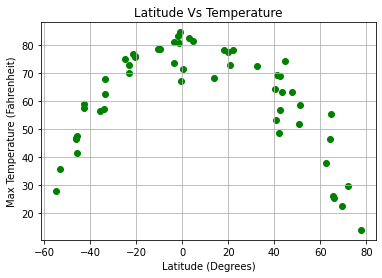

In [198]:
# Scatterplots
lat = weather_response_df["Latitude"]
temp = weather_response_df["Max Temp"]

plt.scatter(lat,temp, color = "r, marker='o')
plt.title('Latitude Vs Temperature')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

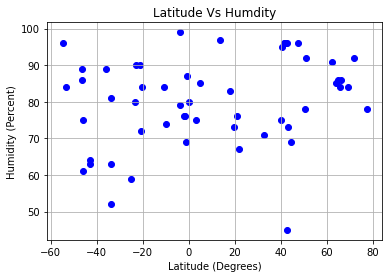

In [199]:
lat = weather_response_df["Latitude"]
hum = weather_response_df["Humidity"]

plt.scatter(lat,hum, color = "g", marker='o')
plt.title('Latitude Vs Humdity')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (Percent)')
plt.grid()
plt.savefig('../output_data/scatterplot_lat_hum')
plt.show()

## Latitude vs. Cloudiness Plot

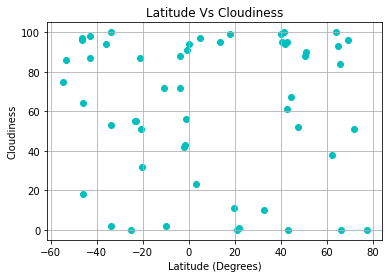

In [204]:
lat = weather_response_df["Latitude"]
cloud = weather_response_df["Cloudiness"]

plt.scatter(lat, cloud, color = "c", marker='o')
plt.title('Latitude Vs Cloudiness')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('../output_data/scatterplot_lat_cloud')
plt.show()

## Latitude vs. Wind Speed Plot

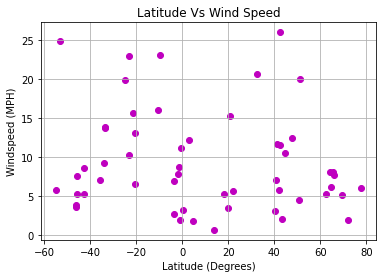

In [206]:
# Lat vs Wind
lat = weather_response_df["Latitude"]
wind = weather_response_df["Wind Speed"]

plt.scatter(lat, wind, color = "m", marker='o')
plt.title('Latitude Vs Wind Speed')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Windspeed (MPH)')
plt.grid()
plt.savefig('../output_data/scatterplot_lat_wind')
plt.show()

## Linear Regression

In [208]:
# Linear Regression

# Separate by Hemisphere
north_hemi_df = weather_response_df.loc[weather_response_df['Latitude']>0]
south_hemi_df = weather_response_df.loc[weather_response_df['Latitude']>0]

x_val = weather_response_df["Latitude"]
x_val.count

<bound method Series.count of 0     47.6666
1     42.6001
2    -23.1203
3      4.8256
4    -21.2000
5    -20.3297
6    -42.8794
7     22.0752
8     42.0970
9     20.9310
10    62.4560
11    71.9167
12    32.6881
13   -53.1500
14   -46.1927
15    -9.8000
16   -24.8667
17    -1.5843
18   -22.9661
19    66.1451
20    13.8333
21    -0.7393
22   -33.5906
23   -45.7500
24    17.9833
25   -33.6500
26   -54.8000
27    42.5696
28   -35.7167
29   -33.9258
30   -10.6167
31    50.6789
32    41.3712
33   -46.1333
34    40.5992
35    -2.0226
36   -20.5167
37    43.2500
38   -45.8667
39    64.2539
40    -3.7703
41    -3.6667
42    19.7297
43   -42.7826
44    40.1629
45    69.2167
46    44.6900
47     3.0707
48    51.2260
49    64.8080
50    -0.9492
51    65.6145
52    77.4840
53     0.1500
Name: Latitude, dtype: float64>

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [213]:
x_val = north_hemi_df['Latitude']
y_val = north_hemi_df['Max Temp']

(slope, intercept, r, p, std_err) = linregress(x_val, y_val)

reg_val = x_val * slope + intercept

plt. plot(x, m*x + b) add line of best fit.
plt.scatter(x_val,y_val, color = "g")
plt.plot(x_val, r)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('../output_data/nh_temp_lat_linreg')
plt.show()

SyntaxError: invalid syntax (<ipython-input-213-2c6e8c17058a>, line 8)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression